In [22]:
import scanpy as sc
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

DATA_PATH = 'transcriptomic_preproc'
MARKERS_CSF_MS_PATH = 'results\markers_CSF_MS.json'
MARKERS_PBMC_MS_PATH = 'results\markers_PBMC_MS.json'
MARKERS_CSF_HC_PATH = 'results\markers_CSF_HC.json'
MARKERS_PBMC_HC_PATH = 'results\markers_PBMC_HC.json'
RANDOM_STATE = 42

In [23]:
markers_csf_ms = json.load(open(MARKERS_CSF_MS_PATH))
markers_pbmc_ms = json.load(open(MARKERS_PBMC_MS_PATH))
markers_csf_hc = json.load(open(MARKERS_CSF_HC_PATH))
markers_pbmc_hc = json.load(open(MARKERS_PBMC_HC_PATH))

In [24]:
markers_csf_ms.keys(), markers_csf_hc.keys()

(dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']),
 dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Monocytes', 'Plasma cells', 'T cells']))

In [25]:
markers_pbmc_ms.keys(), markers_pbmc_hc.keys()

(dict_keys(['B cells', 'Cycling cells', 'DC', 'Double-positive thymocytes', 'ETP', 'HSC/MPP', 'ILC', 'Macrophages', 'Mast cells', 'Megakaryocyte precursor', 'Megakaryocytes/platelets', 'Monocytes', 'Plasma cells', 'T cells', 'pDC']),
 dict_keys(['B cells', 'DC', 'HSC/MPP', 'ILC', 'Megakaryocyte precursor', 'Monocytes', 'Plasma cells', 'T cells']))

In [26]:
cell_types = list(markers_csf_ms.keys()) + list(markers_pbmc_ms.keys()) + list(markers_csf_hc.keys()) + list(markers_pbmc_hc.keys())
cell_types = np.unique(cell_types)
cell_types = cell_types.tolist()

### CSF

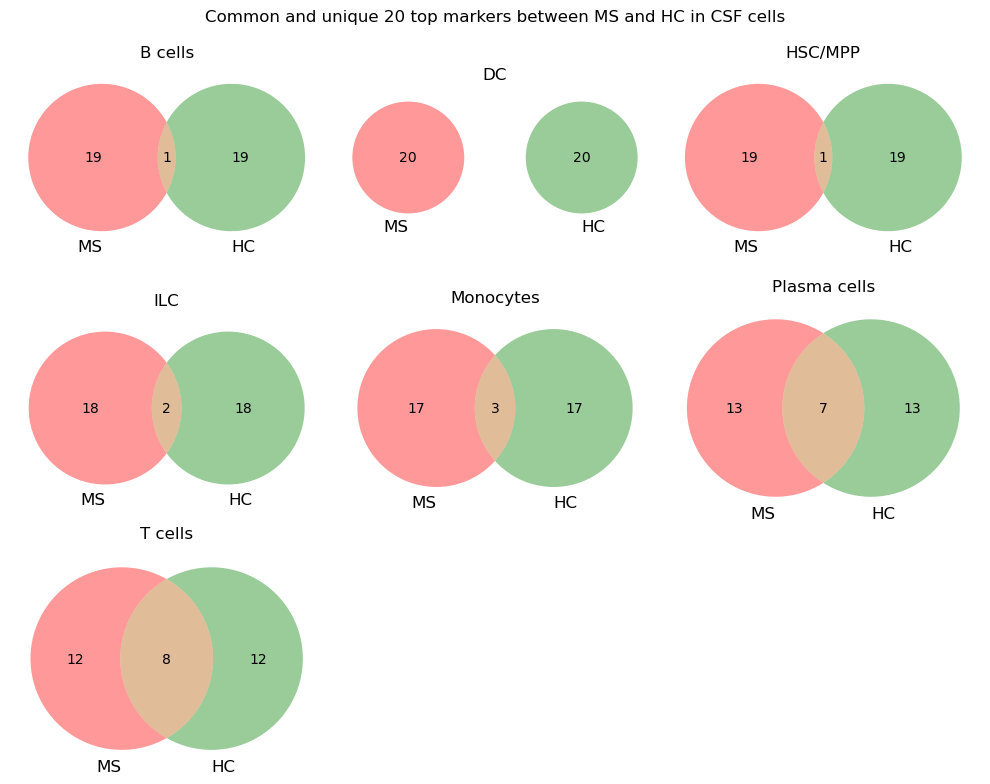

In [27]:
common_markers = {}
unique_markers_MS = {}
unique_markers_HC = {}

for cell_type in markers_csf_ms:
    common_markers[cell_type] = set(markers_csf_ms[cell_type]).intersection(markers_csf_hc[cell_type])
    unique_markers_MS[cell_type] = set(markers_csf_ms[cell_type]) - common_markers[cell_type]
    unique_markers_HC[cell_type] = set(markers_csf_hc[cell_type]) - common_markers[cell_type]

# Crea il diagramma di Venn
plt.figure(figsize=(10, 8))
for i, cell_type in enumerate(markers_csf_ms):
    ax = plt.subplot(3, 3, i+1)
    venn2(subsets=(len(unique_markers_MS[cell_type]), len(unique_markers_HC[cell_type]), len(common_markers[cell_type])),
        set_labels=('MS', 'HC'), ax=ax)
    ax.set_title(cell_type)

plt.suptitle('Common and unique 20 top markers between MS and HC in CSF cells')
plt.tight_layout()
plt.show()

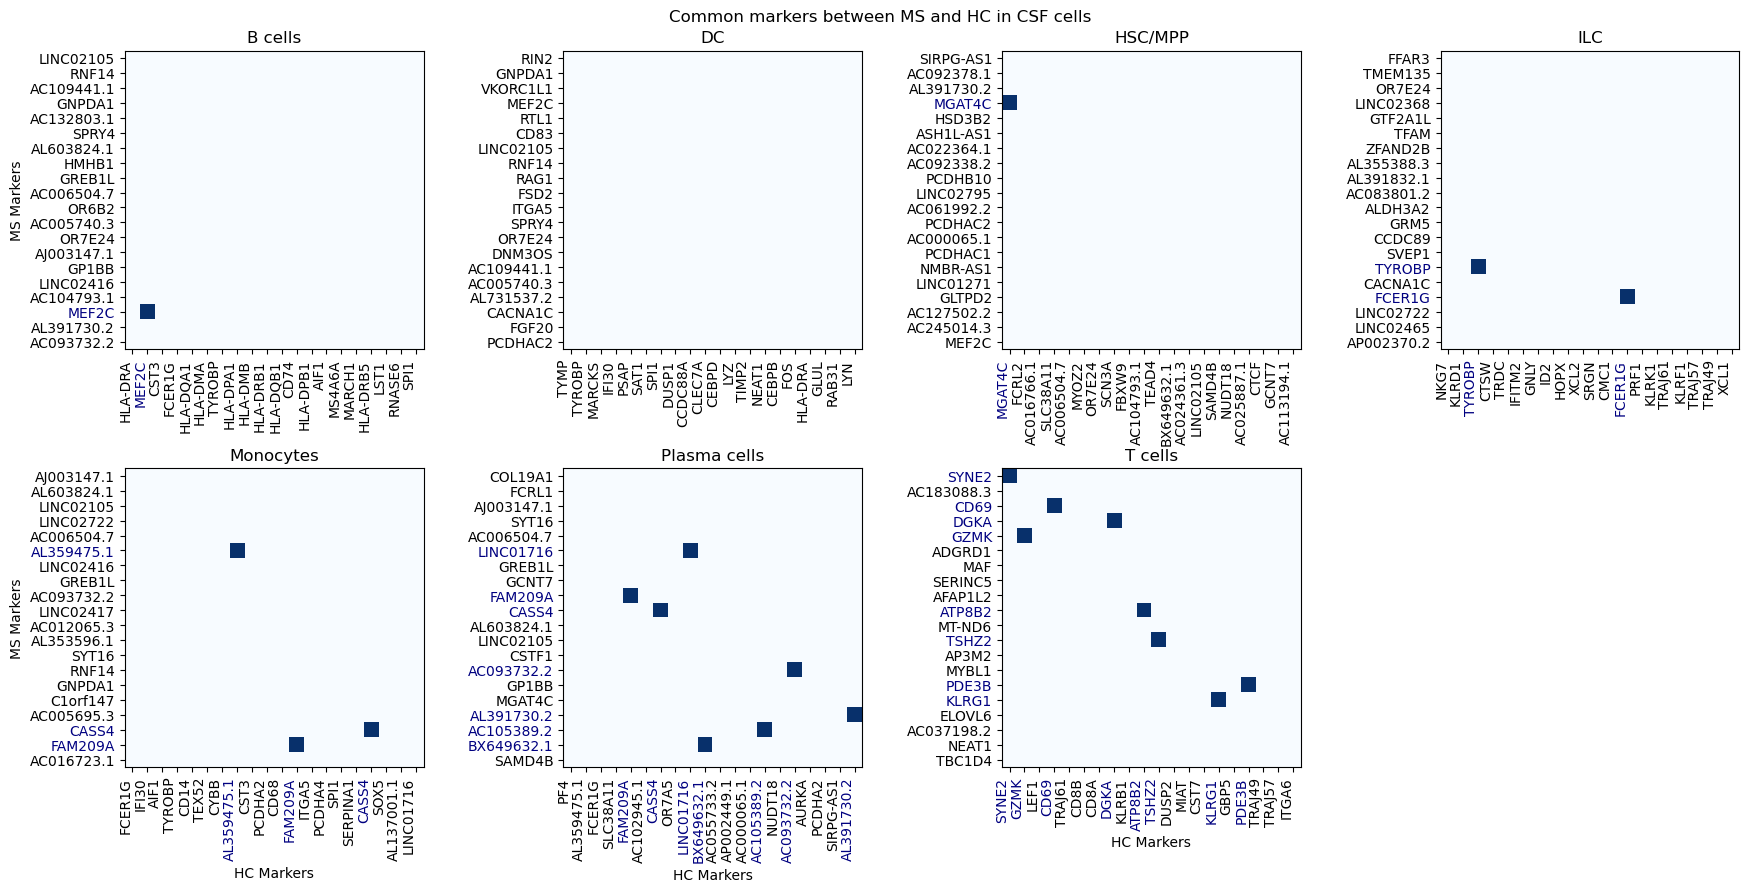

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(18, 9))

for i, ax in enumerate(axs.flatten()):
    if i % 4 == 0: ax.set_ylabel('MS Markers')
    if i >= 4 and i < 7: ax.set_xlabel('HC Markers')

for cell_type, ax in zip(unique_markers_MS.keys(), axs.flatten()):
    markers_MS_cell = markers_csf_ms[cell_type]
    markers_HC_cell = markers_csf_hc[cell_type]

    matrix = np.zeros((len(markers_MS_cell), len(markers_HC_cell)))

    for i, marker_MS in enumerate(markers_MS_cell):
        for j, marker_HC in enumerate(markers_HC_cell):
            if marker_MS == marker_HC:
                matrix[i, j] = 1
    
    ax.imshow(matrix, cmap='Blues', interpolation='nearest')

    ax.set_xticks(np.arange(len(markers_HC_cell)), markers_HC_cell, rotation=90, ha='right')
    for ticklabel in ax.get_xticklabels():
        if ticklabel.get_text() in markers_MS_cell:
            ticklabel.set_color('navy')
        else:
            ticklabel.set_color('k')
    ax.set_yticks(np.arange(len(markers_MS_cell)), markers_MS_cell)
    for ticklabel in ax.get_yticklabels():
        if ticklabel.get_text() in markers_HC_cell:
            ticklabel.set_color('navy')
        else:
            ticklabel.set_color('k')
    ax.set_title(f'{cell_type}')

plt.suptitle('Common markers between MS and HC in CSF cells')
plt.tight_layout()
axs[1, 3].axis('off')
plt.show()

In [29]:
csf_df = pd.DataFrame(common_markers.items(), columns=['Cell Type', 'Common Markers'])
csf_unique_MS_df = pd.DataFrame(unique_markers_MS.items(), columns=['Cell Type', 'MS Unique Markers'])
csf_unique_HC_df = pd.DataFrame(unique_markers_HC.items(), columns=['Cell Type', 'HC Unique Markers'])

In [30]:
csf_df

,Cell Type,Common Markers
0,B cells,{MEF2C}
1,DC,{}
2,HSC/MPP,{MGAT4C}
3,ILC,"{FCER1G, TYROBP}"
4,Monocytes,"{FAM209A, CASS4, AL359475.1}"
5,Plasma cells,"{AC093732.2, FAM209A, AC105389.2, AL391730.2, ..."
6,T cells,"{ATP8B2, DGKA, SYNE2, GZMK, TSHZ2, PDE3B, CD69..."


In [31]:
csf_unique_MS_df

,Cell Type,MS Unique Markers
0,B cells,"{AC109441.1, RNF14, AC006504.7, SPRY4, HMHB1, ..."
1,DC,"{AC109441.1, RNF14, SPRY4, RAG1, PCDHAC2, MEF2..."
2,HSC/MPP,"{PCDHB10, GLTPD2, HSD3B2, PCDHAC2, AL391730.2,..."
3,ILC,"{LINC02722, TFAM, GTF2A1L, TMEM135, FFAR3, ALD..."
4,Monocytes,"{AC006504.7, RNF14, AC016723.1, LINC02722, AC0..."
5,Plasma cells,"{AC006504.7, FCRL1, GCNT7, GP1BB, MGAT4C, SYT1..."
6,T cells,"{AC037198.2, TBC1D4, ELOVL6, ADGRD1, SERINC5, ..."


In [32]:
csf_unique_HC_df

,Cell Type,HC Unique Markers
0,B cells,"{HLA-DPA1, AIF1, CST3, SPI1, HLA-DQB1, HLA-DMA..."
1,DC,"{DUSP1, PSAP, LYN, MARCKS, LYZ, RAB31, SPI1, C..."
2,HSC/MPP,"{AC006504.7, SLC38A11, SCN3A, NUDT18, AC104793..."
3,ILC,"{TRDC, SRGN, ID2, TRAJ61, TRAJ49, XCL2, TRAJ57..."
4,Monocytes,"{TEX52, CD14, AL137001.1, AIF1, CST3, SPI1, TY..."
5,Plasma cells,"{AURKA, AC102945.1, AC000065.1, FCER1G, AL3594..."
6,T cells,"{ITGA6, MIAT, TRAJ61, TRAJ49, CD8B, CST7, KLRB..."


In [33]:
# save results
csf_df.to_csv('results/common_markers_CSF.csv', index=False)
csf_unique_MS_df.to_csv('results/unique_markers_MS_CSF.csv', index=False)
csf_unique_HC_df.to_csv('results/unique_markers_HC_CSF.csv', index=False)

### PBMC

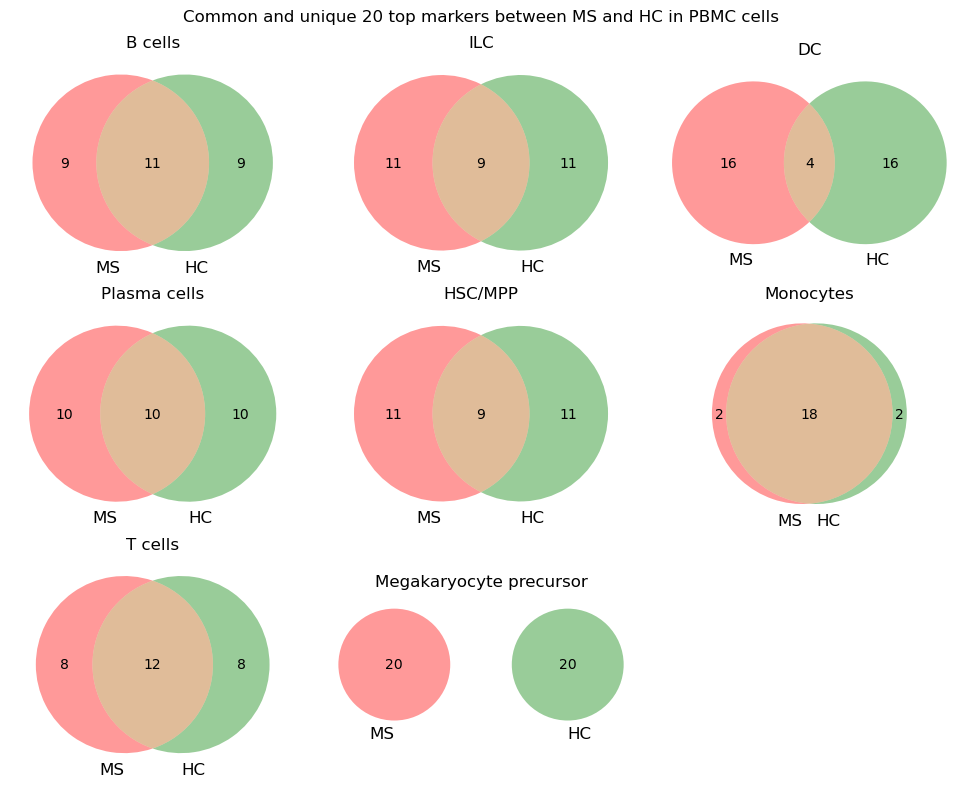

In [34]:
common_markers = {}
unique_markers_MS = {}
unique_markers_HC = {}

common_markers_list = list(set(markers_pbmc_ms.keys()).intersection(markers_pbmc_hc.keys()))

for cell_type in common_markers_list:
    common_markers[cell_type] = set(markers_pbmc_ms[cell_type]).intersection(markers_pbmc_hc[cell_type])
    unique_markers_MS[cell_type] = set(markers_pbmc_ms[cell_type]) - common_markers[cell_type]
    unique_markers_HC[cell_type] = set(markers_pbmc_hc[cell_type]) - common_markers[cell_type]

plt.figure(figsize=(10, 8))
for i, cell_type in enumerate(common_markers_list):
    ax = plt.subplot(3, 3, i+1)
    venn2(subsets=(len(unique_markers_MS[cell_type]), len(unique_markers_HC[cell_type]), len(common_markers[cell_type])),
        set_labels=('MS', 'HC'), ax=ax)
    ax.set_title(cell_type)

plt.suptitle('Common and unique 20 top markers between MS and HC in PBMC cells')
plt.tight_layout()
plt.show()

In [35]:
common_cell_type_pbmc = set(markers_pbmc_ms.keys()).intersection(markers_pbmc_hc.keys())

In [36]:
common_cell_type_pbmc

{'B cells',
 'DC',
 'HSC/MPP',
 'ILC',
 'Megakaryocyte precursor',
 'Monocytes',
 'Plasma cells',
 'T cells'}

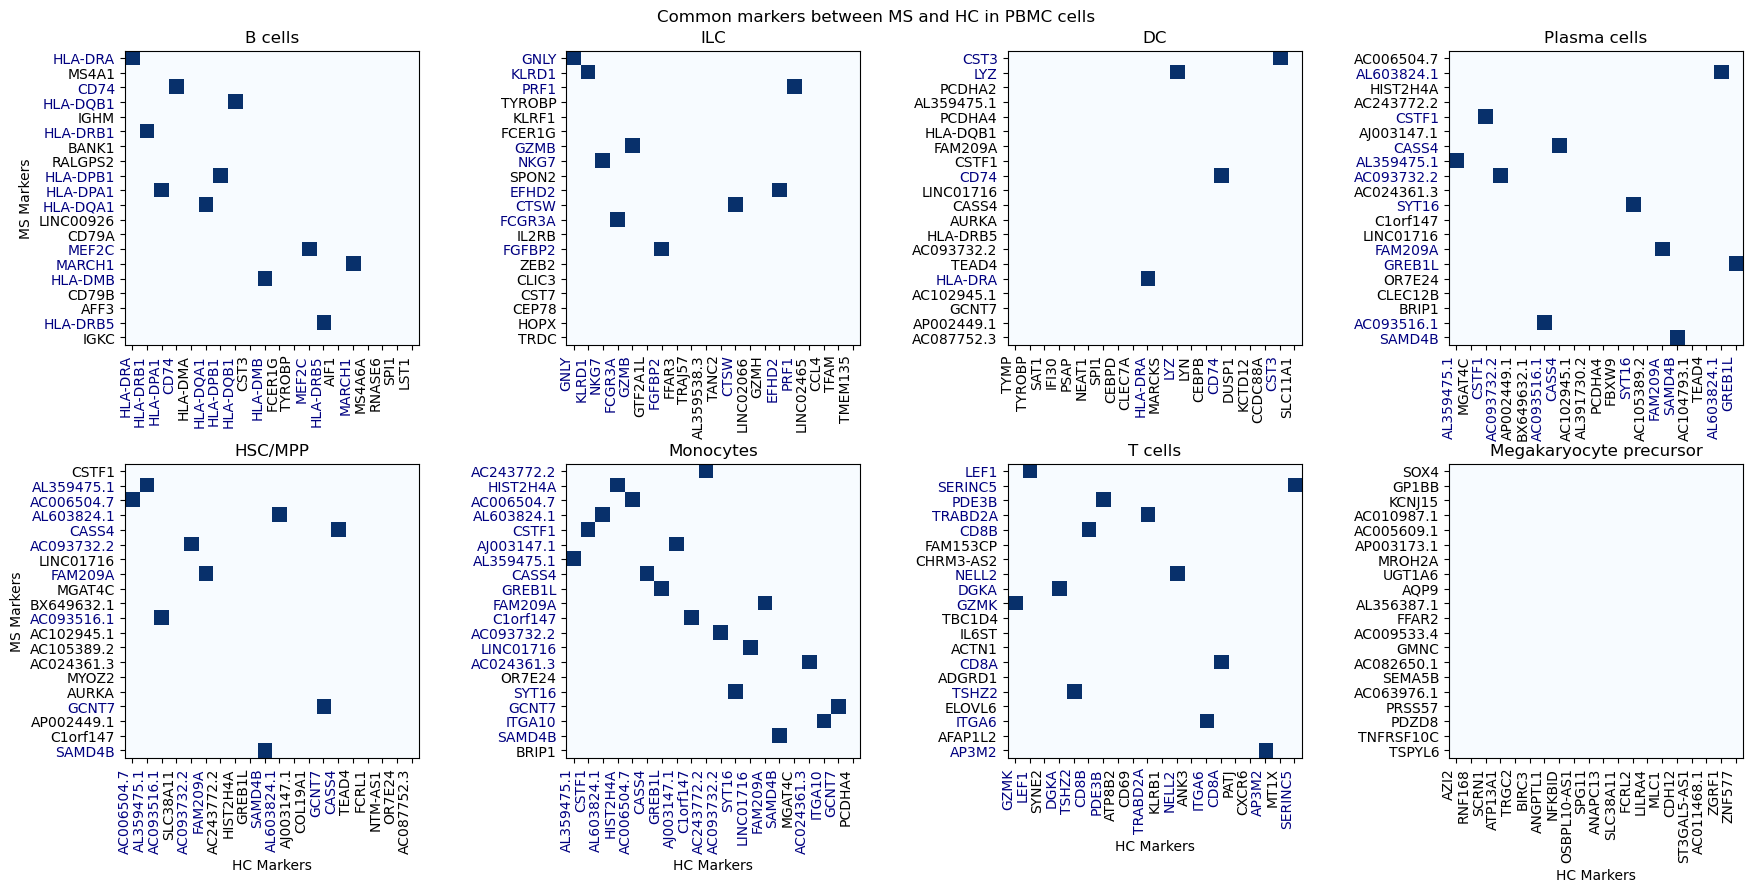

In [37]:
fig, axs = plt.subplots(2, 4, figsize=(18, 9))

for i, ax in enumerate(axs.flatten()):
    if i % 4 == 0: ax.set_ylabel('MS Markers')
    if i >= 4: ax.set_xlabel('HC Markers')

for cell_type, ax in zip(unique_markers_MS.keys(), axs.flatten()):
    if cell_type in common_cell_type_pbmc:
        markers_MS_cell = markers_pbmc_ms[cell_type]
        markers_HC_cell = markers_pbmc_hc[cell_type]

        matrix = np.zeros((len(markers_MS_cell), len(markers_HC_cell)))

        for i, marker_MS in enumerate(markers_MS_cell):
            for j, marker_HC in enumerate(markers_HC_cell):
                if marker_MS == marker_HC:
                    matrix[i, j] = 1
        
        ax.imshow(matrix, cmap='Blues', interpolation='nearest')

        ax.set_xticks(np.arange(len(markers_HC_cell)), markers_HC_cell, rotation=90, ha='right')
        for ticklabel in ax.get_xticklabels():
            if ticklabel.get_text() in markers_MS_cell:
                ticklabel.set_color('navy')
            else:
                ticklabel.set_color('k')
        ax.set_yticks(np.arange(len(markers_MS_cell)), markers_MS_cell)
        for ticklabel in ax.get_yticklabels():
            if ticklabel.get_text() in markers_HC_cell:
                ticklabel.set_color('navy')
            else:
                ticklabel.set_color('k')
        ax.set_title(f'{cell_type}')

plt.suptitle('Common markers between MS and HC in PBMC cells')
plt.tight_layout()
plt.show()

In [38]:
xticks_colors

['red', 'red', 'k', 'k']

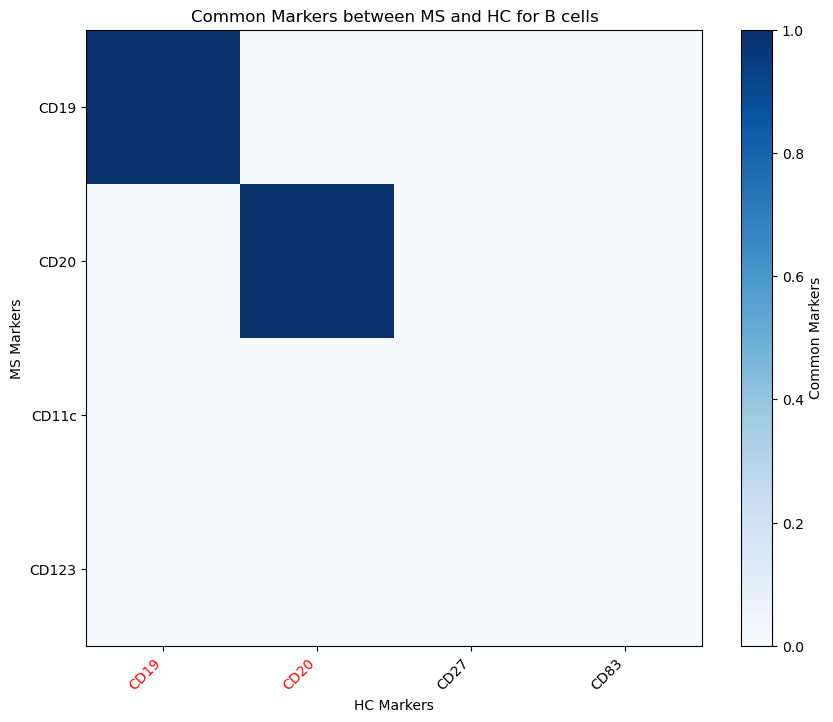

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Dizionari con markers per pazienti MS e HC
markers_MS = {
    'B cells': ['CD19', 'CD20', 'CD11c', 'CD123'],
}

markers_HC = {
    'B cells': ['CD19', 'CD20', 'CD27', 'CD83'],
}

# Creare una heatmap per ogni cell type
for cell_type in markers_MS.keys():
    markers_MS_cell = markers_MS[cell_type]
    markers_HC_cell = markers_HC[cell_type]

    # Creare una matrice binaria per i markers comuni (1) e non comuni (0)
    matrix = np.zeros((len(markers_MS_cell), len(markers_HC_cell)))

    for i, marker_MS in enumerate(markers_MS_cell):
        for j, marker_HC in enumerate(markers_HC_cell):
            if marker_MS == marker_HC:
                matrix[i, j] = 1

    # Creare un plot della heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')

    # Aggiungere etichette agli assi
    plt.xticks(np.arange(len(markers_HC_cell)), markers_HC_cell, rotation=45, ha='right', color='r')
    for ticklabel in plt.gca().get_xticklabels():
        if ticklabel.get_text() in markers_MS_cell:
            ticklabel.set_color('r')
        else:
            ticklabel.set_color('k')
    plt.yticks(np.arange(len(markers_MS_cell)), markers_MS_cell)

    # Aggiungere una legenda
    plt.colorbar(label='Common Markers')

    plt.xlabel('HC Markers')
    plt.ylabel('MS Markers')
    plt.title(f'Common Markers between MS and HC for {cell_type}')

    plt.show()

In [40]:
pbmc_df = pd.DataFrame(common_markers.items(), columns=['Cell Type', 'Common Markers'])
pbmc_unique_MS_df = pd.DataFrame(unique_markers_MS.items(), columns=['Cell Type', 'MS Unique Markers'])
pbmc_unique_HC_df = pd.DataFrame(unique_markers_HC.items(), columns=['Cell Type', 'HC Unique Markers'])

In [41]:
pbmc_df

,Cell Type,Common Markers
0,B cells,"{CD74, HLA-DPA1, HLA-DRB5, HLA-DPB1, HLA-DMB, ..."
1,ILC,"{PRF1, FCGR3A, EFHD2, GZMB, KLRD1, CTSW, FGFBP..."
2,DC,"{LYZ, CD74, CST3, HLA-DRA}"
3,Plasma cells,"{AC093732.2, AC093516.1, AL359475.1, FAM209A, ..."
4,HSC/MPP,"{AC006504.7, AC093732.2, GCNT7, AC093516.1, FA..."
5,Monocytes,"{AC006504.7, AC093732.2, GCNT7, AL359475.1, FA..."
6,T cells,"{ITGA6, DGKA, CD8B, CD8A, SERINC5, GZMK, TSHZ2..."
7,Megakaryocyte precursor,{}


In [42]:
pbmc_unique_HC_df

,Cell Type,HC Unique Markers
0,B cells,"{FCER1G, AIF1, SPI1, CST3, HLA-DMA, RNASE6, LS..."
1,ILC,"{LINC02066, TANC2, TFAM, GTF2A1L, AL359538.3, ..."
2,DC,"{DUSP1, PSAP, LYN, MARCKS, SPI1, SLC11A1, CEBP..."
3,Plasma cells,"{AC102945.1, MGAT4C, AL391730.2, TEAD4, AC1053..."
4,HSC/MPP,"{FCRL1, NTM-AS1, SLC38A11, OR7E24, TEAD4, AJ00..."
5,Monocytes,"{PCDHA4, MGAT4C}"
6,T cells,"{ATP8B2, ANK3, CXCR6, SYNE2, MT1X, KLRB1, CD69..."
7,Megakaryocyte precursor,"{CDH12, ATP13A1, ANAPC13, RNF168, BIRC3, SLC38..."


In [43]:
pbmc_unique_MS_df

,Cell Type,MS Unique Markers
0,B cells,"{RALGPS2, LINC00926, CD79B, AFF3, BANK1, IGKC,..."
1,ILC,"{TRDC, KLRF1, IL2RB, FCER1G, CST7, CLIC3, CEP7..."
2,DC,"{AL359475.1, CASS4, HLA-DQB1, AC102945.1, AC09..."
3,Plasma cells,"{AC006504.7, BRIP1, OR7E24, C1orf147, AJ003147..."
4,HSC/MPP,"{AURKA, AC102945.1, MGAT4C, C1orf147, AC105389..."
5,Monocytes,"{BRIP1, OR7E24}"
6,T cells,"{TBC1D4, ACTN1, ELOVL6, ADGRD1, FAM153CP, AFAP..."
7,Megakaryocyte precursor,"{GP1BB, FFAR2, AC082650.1, TNFRSF10C, GMNC, AL..."


In [44]:
# save the results
pbmc_df.to_csv('results/common_markers_pbmc.csv', index=False)
pbmc_unique_MS_df.to_csv('results/unique_markers_MS_pbmc.csv', index=False)
pbmc_unique_HC_df.to_csv('results/unique_markers_HC_pbmc.csv', index=False)